In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('car data.csv')
df['Fuel_Type'].value_counts()
df['Seller_Type'].value_counts()
df['Transmission'].value_counts()
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [2]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [6]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [7]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [13]:
df2 = 2021 - df['Year']
df['NewYear'] = df2
df.drop(['Car_Name','Year'],axis =1,inplace=True)
final_dataset = pd.get_dummies(df,drop_first=True)

In [14]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,NewYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [45]:
X = final_dataset.drop(['Selling_Price'],axis=1)
y = final_dataset['Selling_Price']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [48]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(225, 8)
(76, 8)


In [49]:
from sklearn.svm import SVR
sv = SVR(kernel='linear')
sv.fit(X_train_scaled,y_train)
y_pred = sv.predict(X_test_scaled)

r2 sqyuare value 0.8409669959746956


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 1.100242931930129
MSE: 3.750570159009408
RMSE: 1.9366388819316336


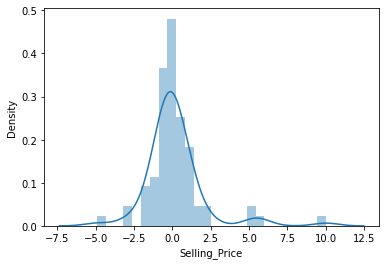

In [50]:
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 square value",re)
sns.distplot(y_test-y_pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [51]:
sv.score(X_test_scaled,y_test, sample_weight=None)

0.8409669959746956

NOTE : using all the columns as independent variables -- score is 0.84

r2 sqyuare value 0.8834446430354392


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 1.0671853228945019
MSE: 2.7487944806375815
RMSE: 1.6579488775705906


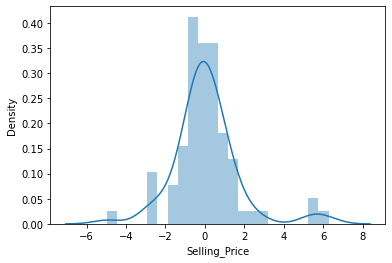

In [42]:
############### Removing columns -- In order to improve r2 value, removing kms_driven clomun , owner and Fuel_Type_Petrol

X_new = X.drop(['Kms_Driven','Owner','Fuel_Type_Petrol'],axis =1)
y = final_dataset['Selling_Price']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 5)

#### Feature Scaling #####
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

##### SVR #################
from sklearn.svm import SVR
sv = SVR(kernel='linear')
sv.fit(X_train_scaled,y_train)
y_pred = sv.predict(X_test_scaled)

########### calculating r-squared #############
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 square value",re)
sns.distplot(y_test-y_pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [44]:
sv.score(X_test_scaled,y_test, sample_weight=None)

0.8834446430354392

Note: after removing 3 columns -- score increased to 0.88 ---

In [58]:
################ Grid Serach CV ################
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             {'C':[1, 10, 100, 1000], 'kernel': ['sigmoid']},
             {'C':[1, 10, 100, 1000],'kernel':['poly']}]

grid_search = GridSearchCV(estimator = sv,
                           param_grid = parameters,
                           verbose = 2,
                           cv = 10,
                           n_jobs = -1)

In [59]:
grid_search = grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [60]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

r2 sqyuare value 0.9712137599375411
MAE: 0.5884060546909571
MSE: 0.6788830634876318


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE: 0.8239436045553311


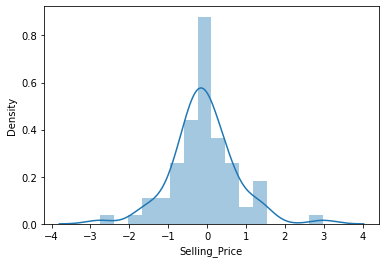

In [67]:
######### Now building a new model based on the best parameters ######

X_new = X.drop(['Kms_Driven','Owner','Fuel_Type_Petrol'],axis =1)
y = final_dataset['Selling_Price']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 5)

#### Feature Scaling #####
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

##### SVR #################
from sklearn.svm import SVR
sv = SVR(kernel='rbf',gamma=0.1,C=10)
sv.fit(X_train_scaled,y_train)
y_pred = sv.predict(X_test_scaled)

########### calculating r-squared #############
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 square value",re)
sns.distplot(y_test-y_pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NOTE: After using best parameters --- r2 value is increased to 0.97.